<a href="https://colab.research.google.com/github/ChhaviSingh02/cam-scanner/blob/main/open_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(842, 474, 3)
(800, 1500, 3)


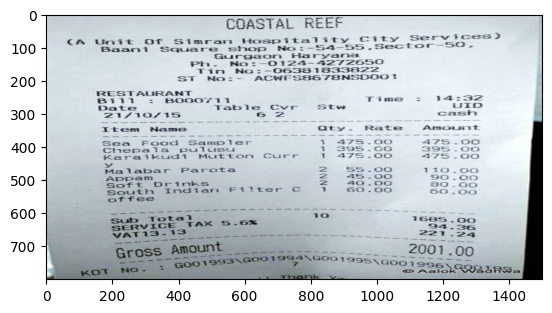

In [ ]:
im_oath="/content/OIP.jpeg"
#read image from path
img=cv2.imread(im_oath)
print(img.shape)

#image resize
img=cv2.resize(img, (1500,800))
print(img.shape)

plt.imshow(img)
plt.show()


#Preprocess the image

1. Remove the noise
2. Edge Detection
3. Contour Extraction
4. Best Contour Selection
5. Project to the screen

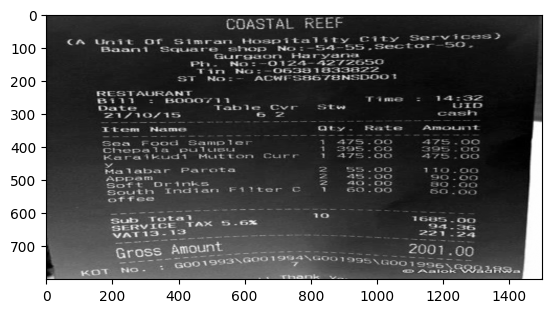

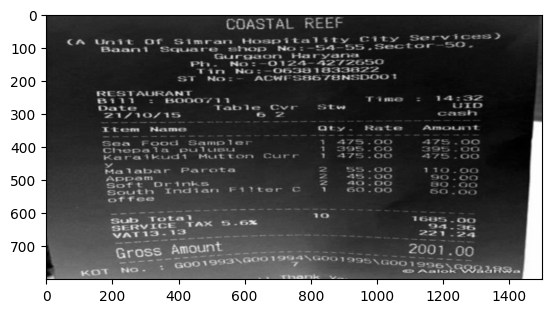

In [ ]:
#Remove the noise:

#Image Blurring

orig=img.copy()
gray=cv2.cvtColor(orig,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="binary")
plt.show()

blurred=cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blurred,cmap="binary")
plt.show()

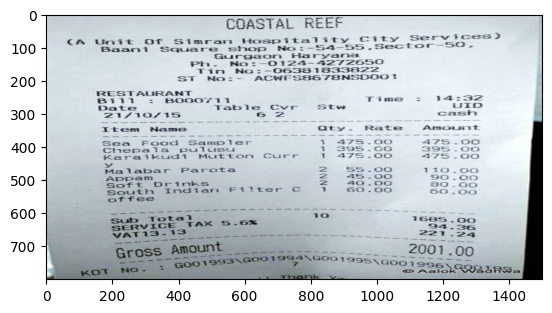

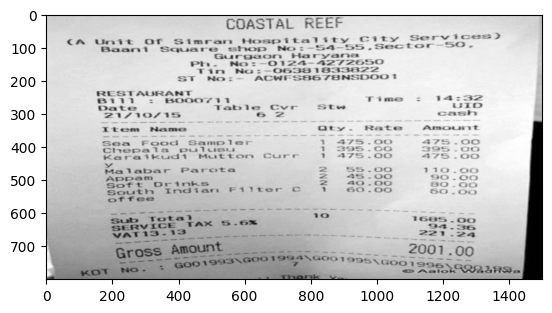

(800, 1500, 3)


In [ ]:
regen=cv2.cvtColor(blurred,cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()
print(regen.shape)

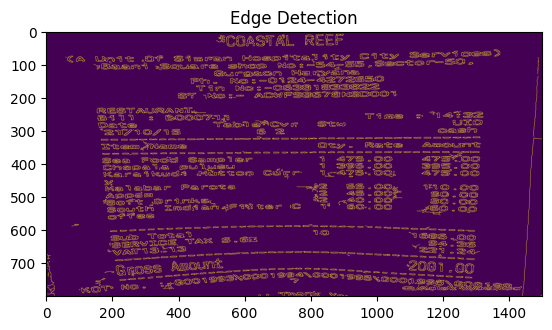

In [ ]:
#Edge Detection

edge=cv2.Canny(blurred,0,50)
orig_edge=edge.copy()

plt.imshow(orig_edge)
plt.title("Edge Detection")
plt.show()


In [ ]:
# Contour Extractions
contours,_ =cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))


contours=sorted(contours, reverse=True,key=cv2.contourArea)

2631


In [ ]:
#Select the best contour REGION
for c in contours:
  p=cv2.arcLength(c,True)
  approx=cv2.approxPolyDP(c, 0.01*p, True)

  if len(approx)==4 :
    target=approx
    break
print(target.shape)


(4, 1, 2)


In [ ]:
#Reorder the target contours

def reorder(h):

  h=h.reshape((4,2))
  print(h)

  hnew=np.zeros((4,2), dtype=np.float32)
  add=h.sum(axis=1)
  hnew[3]=h[np.argmax(add)]
  hnew[1]=h[np.argmax(add)]

  diff=np.diff(h, axis=1)
  hnew[0]=h[np.argmax(diff)]
  hnew[2]=h[np.argmax(diff)]

  return hnew

In [ ]:
reorder = reorder(target)
print("*********")
print(reorder)

[[345 760]
 [345 763]
 [351 763]
 [351 760]]
*********
[[345. 763.]
 [351. 763.]
 [345. 763.]
 [351. 763.]]


In [ ]:
#project to a picture screen

input_representation=reorder
output_map = np.float32([[0, 0], [800, 0], [800, 800], [0, 800]])  # Updated output_map


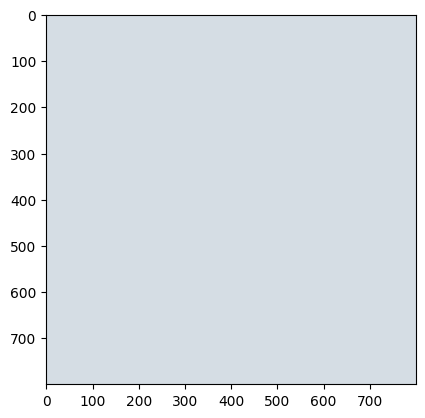

In [ ]:
M=cv2.getPerspectiveTransform(input_representation,output_map)
ans=cv2.warpPerspective(orig,M,(800,800))
plt.imshow(ans)
plt.show()